In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

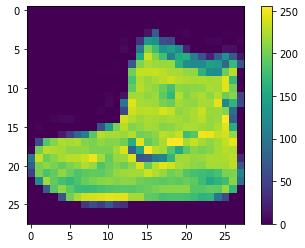

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

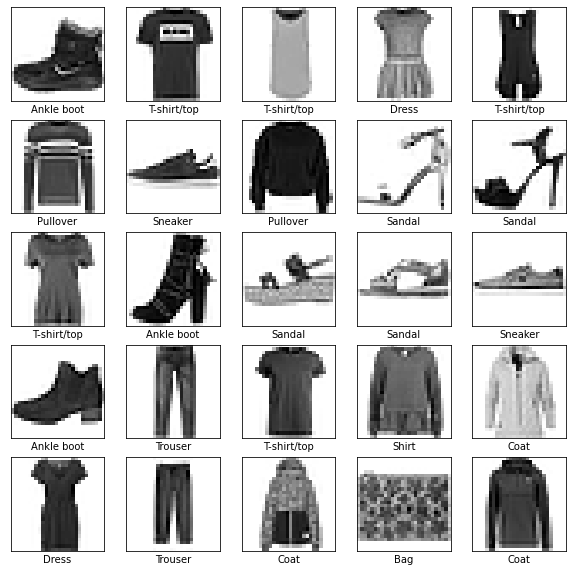

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [12]:
train_images = np.expand_dims(train_images, axis = -1)
train_labels = np.array(train_labels)

In [13]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28, 1) (60000,)


In [14]:
test_images = np.expand_dims(test_images, axis = -1)
test_labels = np.array(test_labels)

In [15]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28, 1) (10000,)


In [16]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3),padding="same", activation = 'relu', input_shape = train_images.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),padding="same", activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),padding="same", activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4404 - accuracy: 0.8390
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2843 - accuracy: 0.8954
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2437 - accuracy: 0.9100
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2125 - accuracy: 0.9211
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1905 - accuracy: 0.9279
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1694 - accuracy: 0.9360
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1520 - accuracy: 0.9431
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1344 - accuracy: 0.9499
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1203 - accuracy: 0.9542
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - l

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.4671 - accuracy: 0.9167

Test accuracy: 0.916700005531311


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [39]:
import random
ri = random.randint(0,9999)

In [40]:
predictions[ri]

array([3.0815805e-09, 7.6327149e-25, 1.3804692e-14, 1.1335006e-21,
       2.2961928e-18, 4.0954794e-05, 8.5737626e-20, 9.9995899e-01,
       6.3514654e-18, 2.5802900e-11], dtype=float32)

In [41]:
np.argmax(predictions[ri])

7

In [42]:
test_labels[ri]

7

In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[ri], img[ri]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[ri]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [44]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [64]:
print(test_images.shape)

(10000, 28, 28)


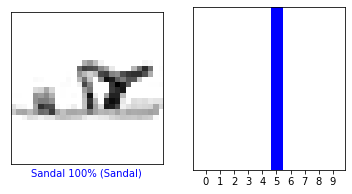

In [48]:
ri = random.randint(0,9999)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(ri, predictions[ri], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(ri, predictions[ri],  test_labels)
plt.show()

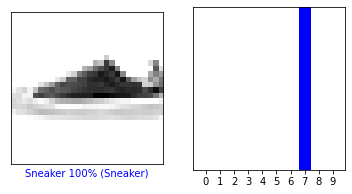

In [49]:
ri = random.randint(0,9999)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(ri, predictions[ri], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(ri, predictions[ri],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

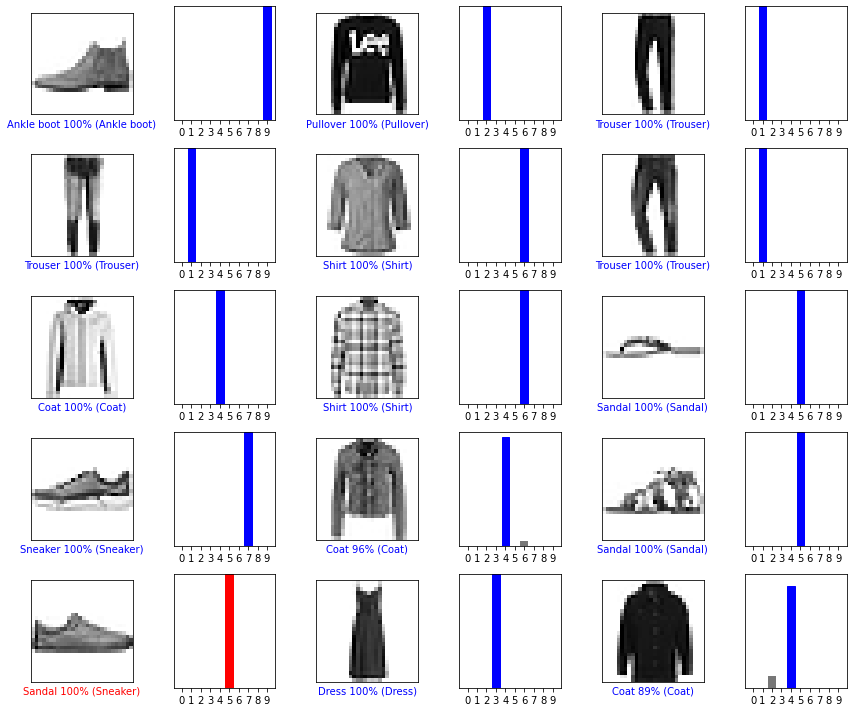

In [68]:
# Correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for ri in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*ri+1)
  plot_image(ri, predictions[ri], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*ri+2)
  plot_value_array(ri, predictions[ri], test_labels)
plt.tight_layout()
plt.show()